In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
palette = sns.color_palette("rainbow", 8)

In [2]:
raw_data=pd.read_csv('C:/Users/HP/Documents/backups/layoffs_data.csv')

In [3]:
raw_data

,Company,Location_HQ,Industry,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,Laid_Off_Count,List_of_Employees_Laid_Off
0,Openpay,Melbourne,Finance,1.00,2023-02-07 00:00:00,https://www.9news.com.au/finance/openpay-buy-n...,299.0,Post-IPO,2023-02-07 03:58:28,Australia,NaN,Unknown
1,Dell,Austin,Hardware,0.05,2023-02-06 00:00:00,https://www.bloomberg.com/news/articles/2023-0...,NaN,Post-IPO,2023-02-06 15:48:37,United States,6650.0,Unknown
2,Loggi,Sao Paulo,Logistics,0.07,2023-02-06 00:00:00,https://www.infomoney.com.br/negocios/pela-seg...,507.0,Series F,2023-02-07 03:45:59,Brazil,300.0,Unknown
3,Drift,Boston,Marketing,NaN,2023-02-06 00:00:00,https://www.bizjournals.com/boston/news/2023/0...,107.0,Acquired,2023-02-07 03:56:03,United States,59.0,Unknown
4,Pocket Aces,Mumbai,Media,0.25,2023-02-06 00:00:00,https://economictimes.indiatimes.com/tech/star...,19.0,Unknown,2023-02-06 19:12:45,India,50.0,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
2187,Service,Los Angeles,Travel,1.00,2020-03-16 00:00:00,https://techcrunch.com/2020/03/16/travel-savin...,5.1,Seed,2020-08-31 15:17:26,United States,NaN,Unknown
2188,HopSkipDrive,Los Angeles,Transportation,0.10,2020-03-13 00:00:00,https://layoffs.fyi/2020/04/02/hopskipdrive-la...,45.0,Unknown,2020-04-03 04:47:03,United States,8.0,Unknown
2189,Panda Squad,SF Bay Area,Consumer,0.75,2020-03-13 00:00:00,https://twitter.com/danielsinger/status/123854...,1.0,Seed,2020-04-17 00:12:49,United States,6.0,Unknown
2190,Tamara Mellon,Los Angeles,Retail,0.40,2020-03-12 00:00:00,https://layoffs.fyi/list/tamara-mellon/,90.0,Series C,2020-03-31 16:04:23,United States,20.0,Unknown


In [4]:
raw_data.describe(include='all')

,Company,Location_HQ,Industry,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,Laid_Off_Count,List_of_Employees_Laid_Off
count,2192,2192,2192,1470.000000,2192,2192,2002.000000,2192,2192,2192,1507.000000,2191
unique,1777,182,30,NaN,459,2000,NaN,16,2153,57,NaN,75
top,Loft,SF Bay Area,Finance,NaN,2020-04-02 00:00:00,Internal memo,NaN,Unknown,2020-03-28 20:52:49,United States,NaN,Unknown
freq,5,563,273,NaN,27,77,NaN,376,40,1435,NaN,2117
mean,NaN,NaN,NaN,0.260121,NaN,NaN,823.342805,NaN,NaN,NaN,233.652953,NaN
std,NaN,NaN,NaN,0.255922,NaN,NaN,5772.854417,NaN,NaN,NaN,765.171737,NaN
min,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,3.000000,NaN
25%,NaN,NaN,NaN,0.100000,NaN,NaN,47.000000,NaN,NaN,NaN,35.000000,NaN
50%,NaN,NaN,NaN,0.170000,NaN,NaN,151.000000,NaN,NaN,NaN,75.000000,NaN
75%,NaN,NaN,NaN,0.300000,NaN,NaN,423.000000,NaN,NaN,NaN,160.000000,NaN


In [5]:
raw_data.isnull().sum()

Company                         0
Location_HQ                     0
Industry                        0
Percentage                    722
Date                            0
Source                          0
Funds_Raised                  190
Stage                           0
Date_Added                      0
Country                         0
Laid_Off_Count                685
List_of_Employees_Laid_Off      1
dtype: int64

In [6]:
raw_data['Date']=pd.to_datetime(raw_data['Date'],errors='coerce')
raw_data['Date']=pd.to_datetime(raw_data['Date'])
raw_data['Date']=raw_data['Date'].dt.year

In [7]:
raw_data

,Company,Location_HQ,Industry,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,Laid_Off_Count,List_of_Employees_Laid_Off
0,Openpay,Melbourne,Finance,1.00,2023,https://www.9news.com.au/finance/openpay-buy-n...,299.0,Post-IPO,2023-02-07 03:58:28,Australia,NaN,Unknown
1,Dell,Austin,Hardware,0.05,2023,https://www.bloomberg.com/news/articles/2023-0...,NaN,Post-IPO,2023-02-06 15:48:37,United States,6650.0,Unknown
2,Loggi,Sao Paulo,Logistics,0.07,2023,https://www.infomoney.com.br/negocios/pela-seg...,507.0,Series F,2023-02-07 03:45:59,Brazil,300.0,Unknown
3,Drift,Boston,Marketing,NaN,2023,https://www.bizjournals.com/boston/news/2023/0...,107.0,Acquired,2023-02-07 03:56:03,United States,59.0,Unknown
4,Pocket Aces,Mumbai,Media,0.25,2023,https://economictimes.indiatimes.com/tech/star...,19.0,Unknown,2023-02-06 19:12:45,India,50.0,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
2187,Service,Los Angeles,Travel,1.00,2020,https://techcrunch.com/2020/03/16/travel-savin...,5.1,Seed,2020-08-31 15:17:26,United States,NaN,Unknown
2188,HopSkipDrive,Los Angeles,Transportation,0.10,2020,https://layoffs.fyi/2020/04/02/hopskipdrive-la...,45.0,Unknown,2020-04-03 04:47:03,United States,8.0,Unknown
2189,Panda Squad,SF Bay Area,Consumer,0.75,2020,https://twitter.com/danielsinger/status/123854...,1.0,Seed,2020-04-17 00:12:49,United States,6.0,Unknown
2190,Tamara Mellon,Los Angeles,Retail,0.40,2020,https://layoffs.fyi/list/tamara-mellon/,90.0,Series C,2020-03-31 16:04:23,United States,20.0,Unknown


In [8]:
raw_data.columns.values

array(['Company', 'Location_HQ', 'Industry', 'Percentage', 'Date',
       'Source', 'Funds_Raised', 'Stage', 'Date_Added', 'Country',
       'Laid_Off_Count', 'List_of_Employees_Laid_Off'], dtype=object)

In [9]:
data=raw_data.drop(['Source','List_of_Employees_Laid_Off','Date_Added'],axis=1)

In [10]:
data=data[data['Laid_Off_Count'].notna()]

In [11]:
data

,Company,Location_HQ,Industry,Percentage,Date,Funds_Raised,Stage,Country,Laid_Off_Count
1,Dell,Austin,Hardware,0.05,2023,NaN,Post-IPO,United States,6650.0
2,Loggi,Sao Paulo,Logistics,0.07,2023,507.0,Series F,Brazil,300.0
3,Drift,Boston,Marketing,NaN,2023,107.0,Acquired,United States,59.0
4,Pocket Aces,Mumbai,Media,0.25,2023,19.0,Unknown,India,50.0
5,Clari,SF Bay Area,Sales,NaN,2023,496.0,Series F,United States,20.0
...,...,...,...,...,...,...,...,...,...
2186,Help.com,Austin,Support,1.00,2020,6.0,Seed,United States,16.0
2188,HopSkipDrive,Los Angeles,Transportation,0.10,2020,45.0,Unknown,United States,8.0
2189,Panda Squad,SF Bay Area,Consumer,0.75,2020,1.0,Seed,United States,6.0
2190,Tamara Mellon,Los Angeles,Retail,0.40,2020,90.0,Series C,United States,20.0


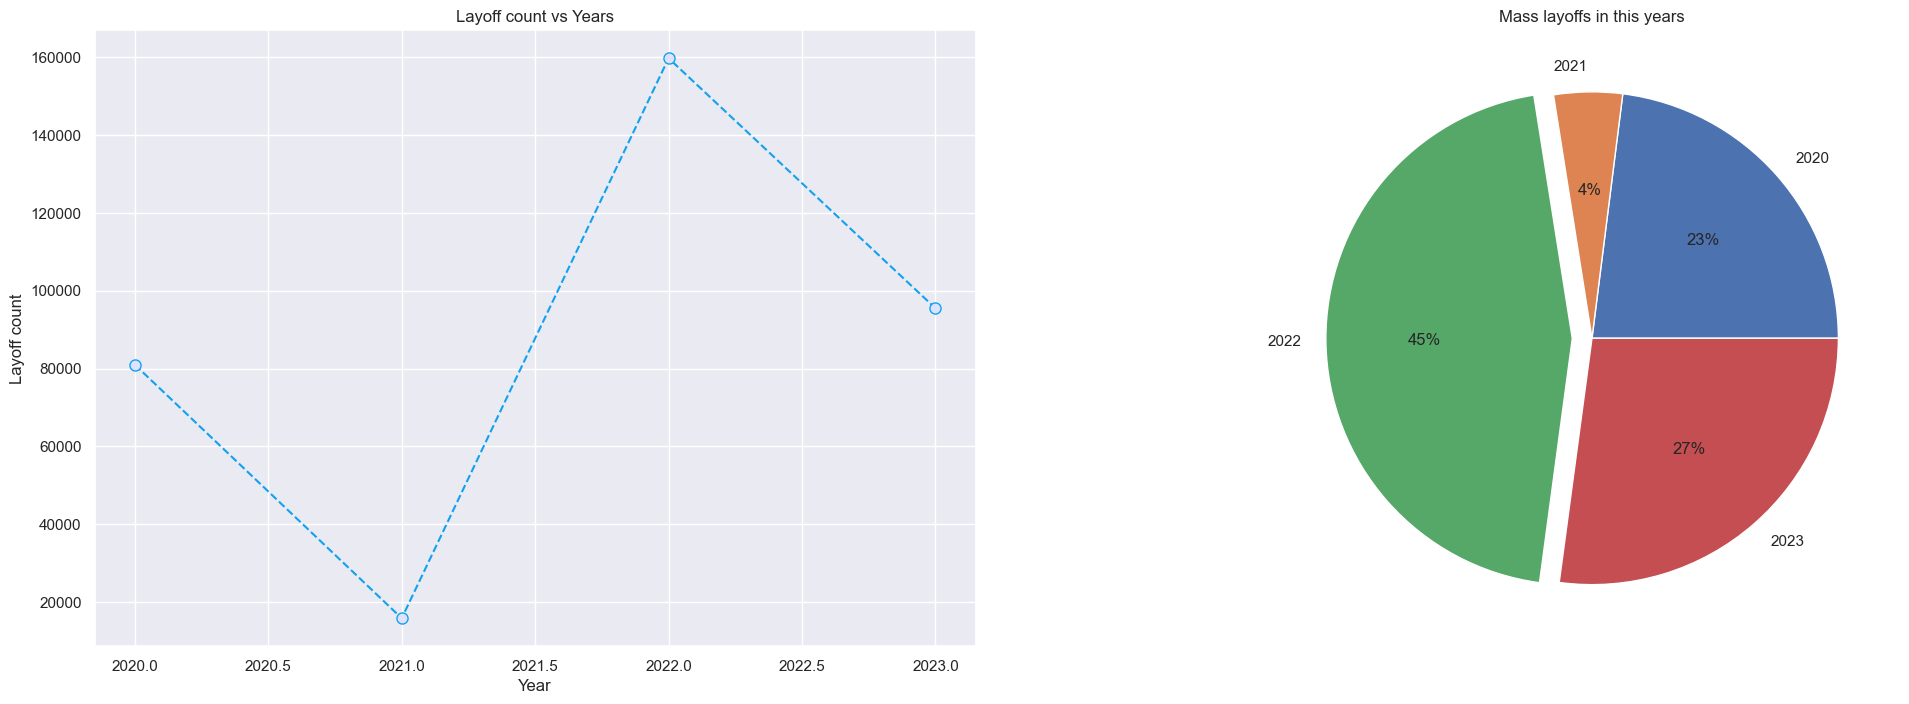

In [12]:
plt.figure(figsize=(25,8))
laidoff_count_year=data.groupby('Date').sum().reset_index()
plt.subplot(1,2,1)

plt.plot(laidoff_count_year['Date'],laidoff_count_year['Laid_Off_Count'],marker="o", linestyle='--', color='#10a2f0',markerfacecolor='#dfe2ff', markersize=8)
plt.xlabel('Year'), plt.ylabel('Layoff count')
plt.title("Layoff count vs Years")

plt.subplot(1,2,2)
plt.pie(data=laidoff_count_year, x=laidoff_count_year['Laid_Off_Count'], labels=laidoff_count_year['Date'], autopct='%.f%%',
        explode = [0, 0, 0.08, 0])
plt.title("Mass layoffs in this years")

plt.show()

In [13]:
laidOff_countByCountry = data.groupby('Country').sum().reset_index()


In [14]:
asia = ['China', 'Hong Kong', 'India', 'Indonesia', 'Malaysia', 'Myanmar', 'Singapore', 'Thailand', 'United Arab Emirates', 'Israel']
europe = ['Austria', 'Bulgaria','Denmark', 'Finland', 'France', 'Germany', 'Ireland', 'Lithuania', 'Luxembourg', 'Norway', 
          'Poland', 'Portugal', 'Romania', 'Russia', 'Sweden', 'Switzerland', 'Netherlands', 'United Kingdom']

n_america = ['Canada', 'Mexico', 'United States']
s_america = ['Argentina', 'Brazil', 'Chile', 'Colombia']

africa = ['Estonia', 'Kenya', 'Nigeria', 'Senegal', 'Seychelles']
oceania = ['Australia', 'New Zealand']

In [15]:
asia_insight = laidOff_countByCountry.loc[laidOff_countByCountry['Country'].isin(asia)]
europe_insight=laidOff_countByCountry.loc[laidOff_countByCountry['Country'].isin(europe)]
african_insight=laidOff_countByCountry[laidOff_countByCountry['Country'].isin(africa)]
oceania_insight=laidOff_countByCountry[laidOff_countByCountry['Country'].isin(oceania)]
s_america_insight=laidOff_countByCountry[laidOff_countByCountry['Country'].isin(s_america)]
n_america_insight=laidOff_countByCountry[laidOff_countByCountry['Country'].isin(n_america)]

In [16]:
n_america_insight

,Country,Percentage,Date,Funds_Raised,Laid_Off_Count
5,Canada,14.3800,161719,11472.9,6259.0
23,Mexico,0.4100,6064,794.0,270.0
42,United States,158.5825,1930445,997635.1,240042.0


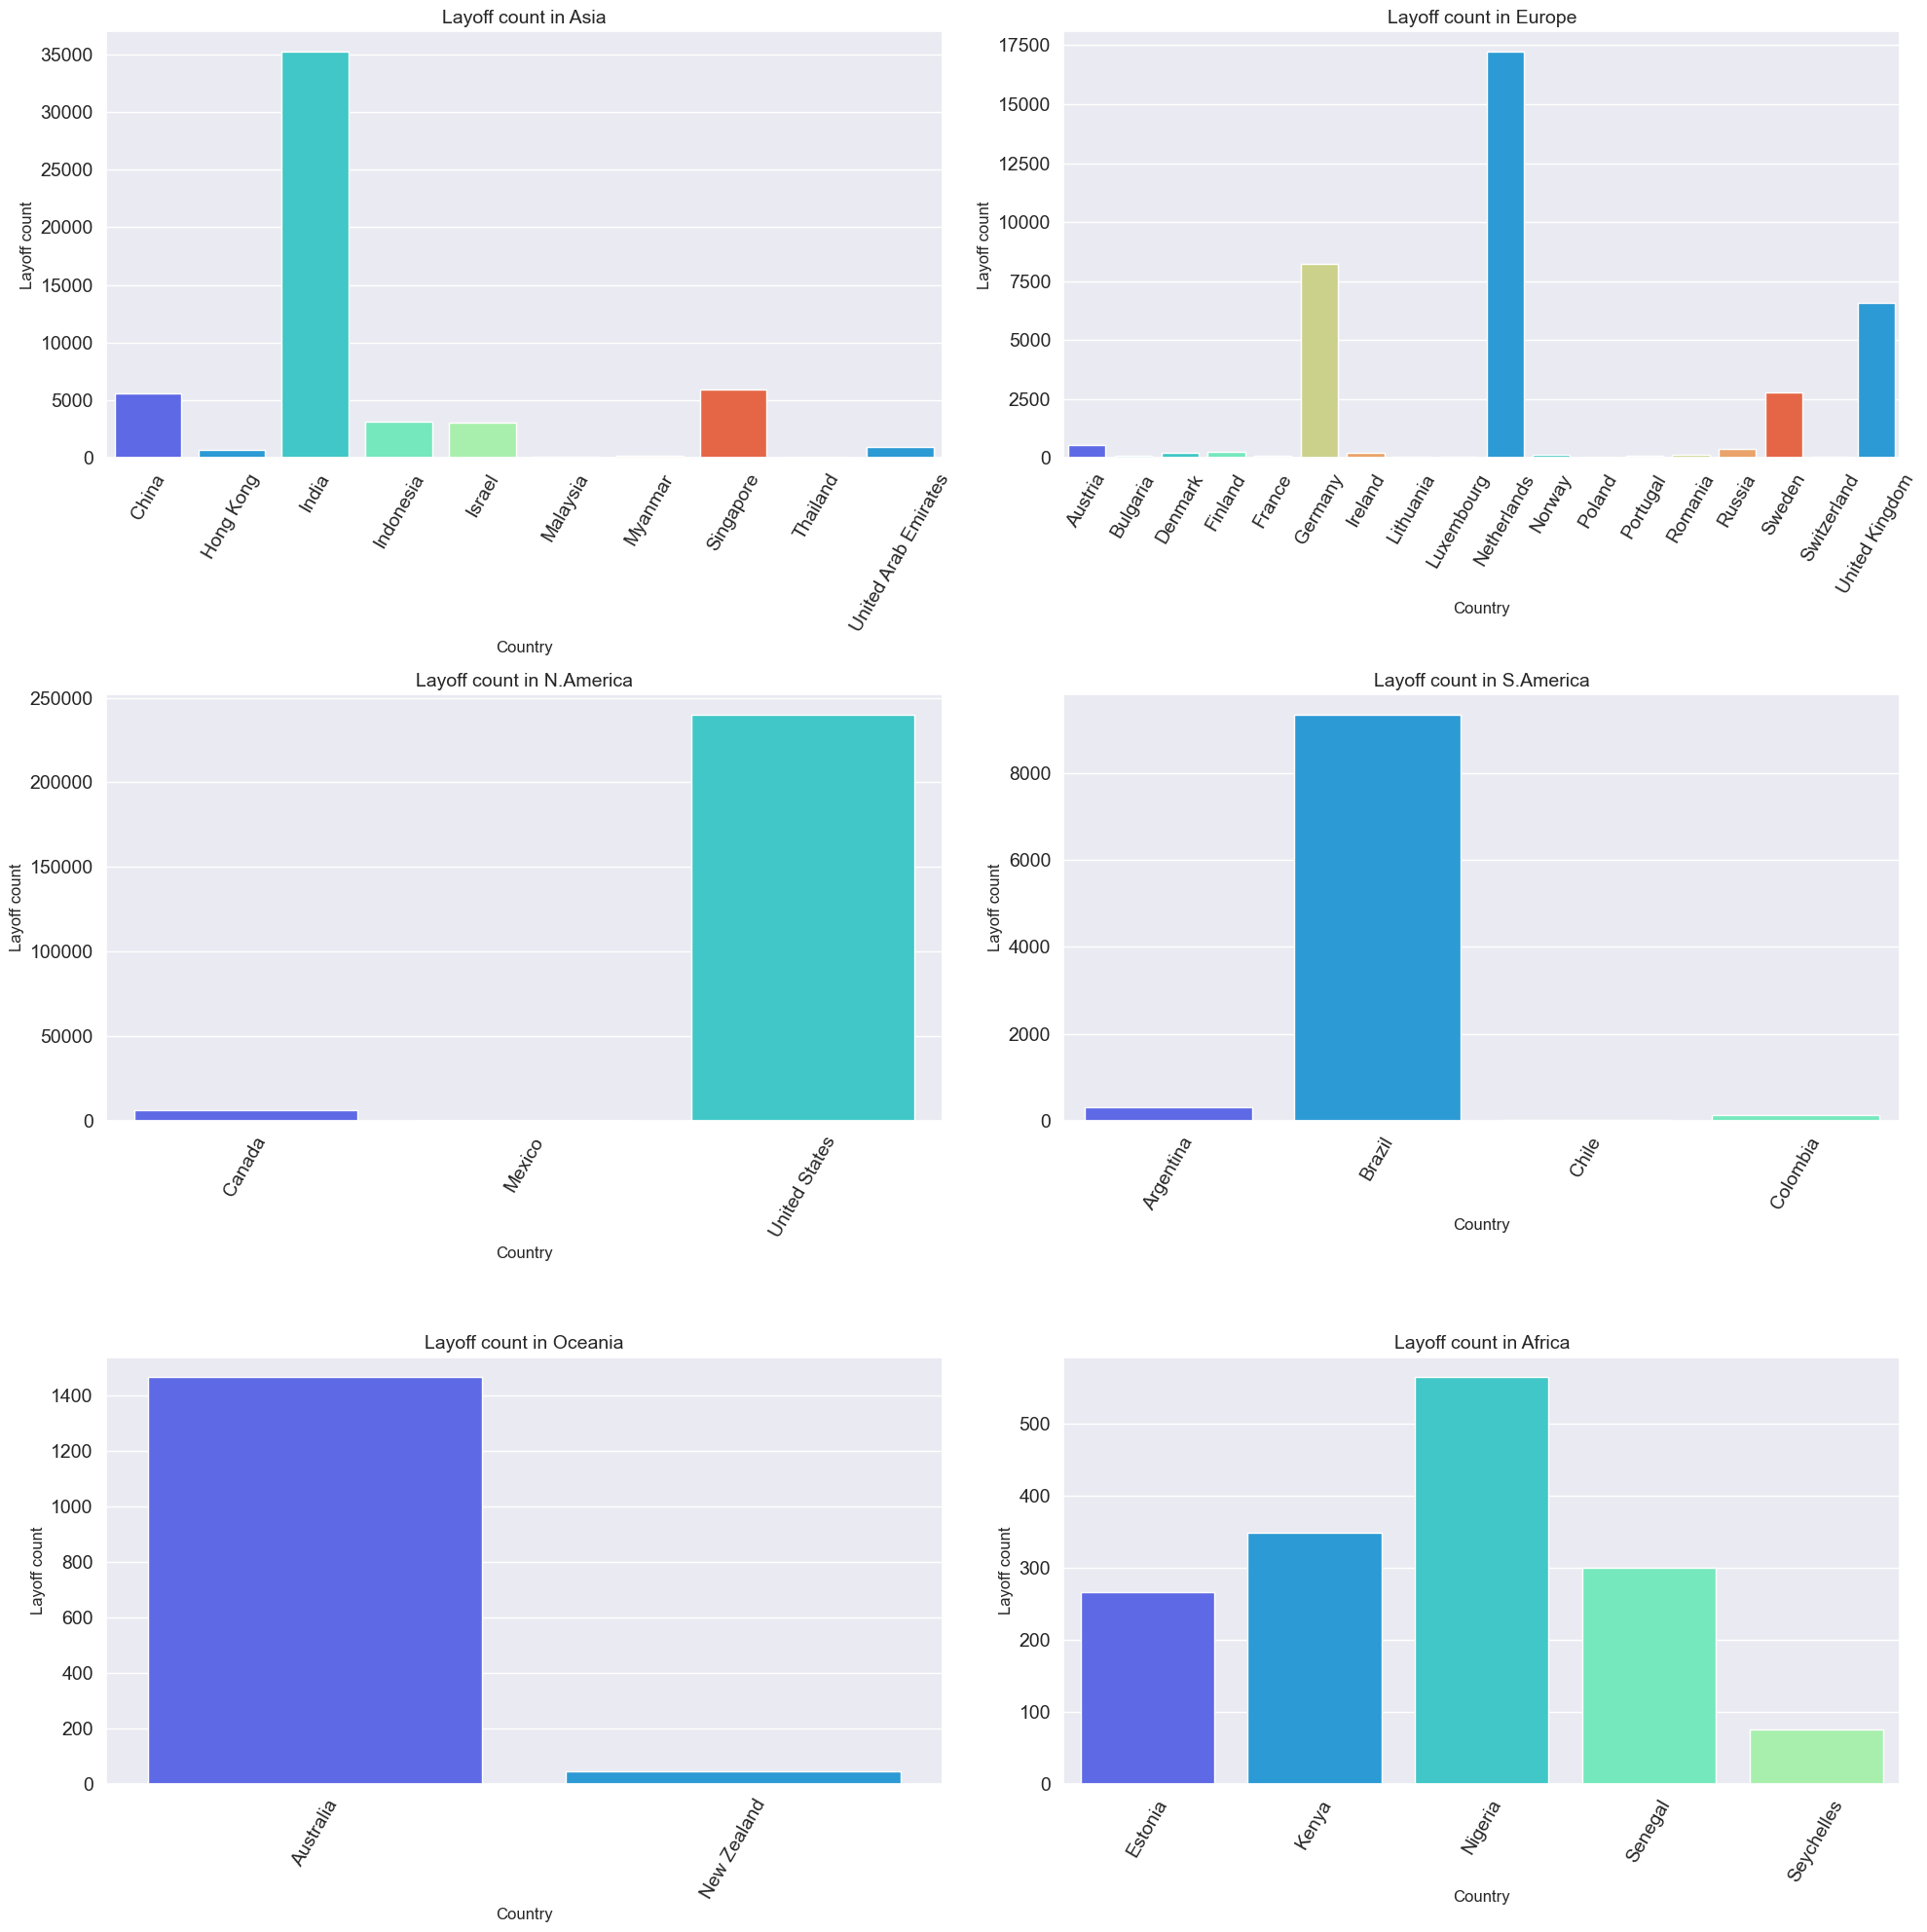

In [17]:
plt.figure(figsize=(20,20))
plt.subplot(3,2,1)
sns.barplot(data=asia_insight,x=asia_insight['Country'],y=asia_insight['Laid_Off_Count'], palette=palette)
plt.xticks(rotation = 60)
plt.xlabel('Country'), plt.ylabel('Layoff count')
plt.title("Layoff count in Asia", fontsize=14), plt.xticks(fontsize=14), plt.yticks(fontsize=14)


plt.subplot(3,2,2)
sns.barplot(data=europe_insight,x=europe_insight['Country'],y=europe_insight['Laid_Off_Count'], palette=palette)
plt.xticks(rotation = 60)
plt.xlabel('Country'), plt.ylabel('Layoff count')
plt.title("Layoff count in Europe", fontsize=14), plt.xticks(fontsize=14), plt.yticks(fontsize=14)


plt.subplot(3,2,3)
sns.barplot(data=n_america_insight,x=n_america_insight['Country'],y=n_america_insight['Laid_Off_Count'], palette=palette)
plt.xticks(rotation = 60)
plt.xlabel('Country'), plt.ylabel('Layoff count')
plt.title("Layoff count in N.America", fontsize=14), plt.xticks(fontsize=14), plt.yticks(fontsize=14)


plt.subplot(3,2,4)
sns.barplot(data=s_america_insight,x=s_america_insight['Country'],y=s_america_insight['Laid_Off_Count'], palette=palette)
plt.xticks(rotation = 60)
plt.xlabel('Country'), plt.ylabel('Layoff count')
plt.title("Layoff count in S.America", fontsize=14), plt.xticks(fontsize=14), plt.yticks(fontsize=14)


plt.subplot(3,2,5)
sns.barplot(data=oceania_insight,x=oceania_insight['Country'],y=oceania_insight['Laid_Off_Count'], palette=palette)
plt.xticks(rotation = 60)
plt.xlabel('Country'), plt.ylabel('Layoff count')
plt.title("Layoff count in Oceania", fontsize=14), plt.xticks(fontsize=14), plt.yticks(fontsize=14)


plt.subplot(3,2,6)
sns.barplot(data=african_insight,x=african_insight['Country'],y=african_insight['Laid_Off_Count'], palette=palette)
plt.xticks(rotation = 60)
plt.xlabel('Country'), plt.ylabel('Layoff count')
plt.title("Layoff count in Africa", fontsize=14), plt.xticks(fontsize=14), plt.yticks(fontsize=14)


plt.tight_layout()
plt.show()

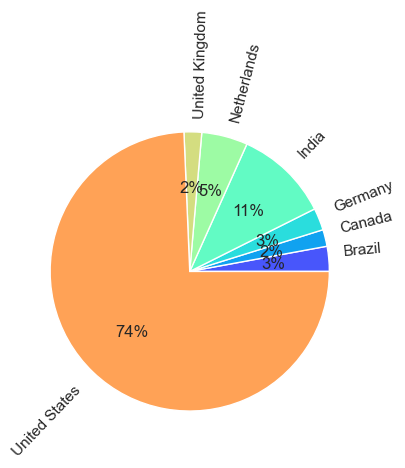

In [18]:
High_laid_countries=list(laidOff_countByCountry['Country'][laidOff_countByCountry['Laid_Off_Count']>6000])
High_laid_countriesdata=laidOff_countByCountry[laidOff_countByCountry['Country'].isin(High_laid_countries)]
plt.pie(data=High_laid_countriesdata, x=High_laid_countriesdata['Laid_Off_Count'], labels=High_laid_countriesdata['Country'], autopct='%.f%%',rotatelabels=True,colors=palette)
plt.xticks(fontsize=50), plt.yticks(fontsize=50)
plt.tight_layout()
plt.show()

In [19]:
grp1_insight = data.loc[(data['Laid_Off_Count'] <= 35)]
grp2_insight = data.loc[(data['Laid_Off_Count'] > 35) & (data['Laid_Off_Count'] <= 73)]
grp3_insight = data.loc[(data['Laid_Off_Count'] > 75) & (data['Laid_Off_Count'] <= 153)]
grp4_insight = data.loc[(data['Laid_Off_Count'] > 153)]

In [20]:
grp1_insight

,Company,Location_HQ,Industry,Percentage,Date,Funds_Raised,Stage,Country,Laid_Off_Count
5,Clari,SF Bay Area,Sales,NaN,2023,496.0,Series F,United States,20.0
9,Lightico,Tel Aviv,Finance,0.25,2023,42.0,Series B,Israel,20.0
35,Exterro,Portland,Legal,0.03,2023,100.0,Private Equity,United States,24.0
36,TheSkimm,New York City,Media,0.10,2023,28.0,Series C,United States,17.0
53,AU10TIX,Tel Aviv,Security,0.09,2023,80.0,Unknown,Israel,19.0
...,...,...,...,...,...,...,...,...,...
2184,Flytedesk,Boulder,Marketing,0.20,2020,4.0,Seed,United States,4.0
2186,Help.com,Austin,Support,1.00,2020,6.0,Seed,United States,16.0
2188,HopSkipDrive,Los Angeles,Transportation,0.10,2020,45.0,Unknown,United States,8.0
2189,Panda Squad,SF Bay Area,Consumer,0.75,2020,1.0,Seed,United States,6.0


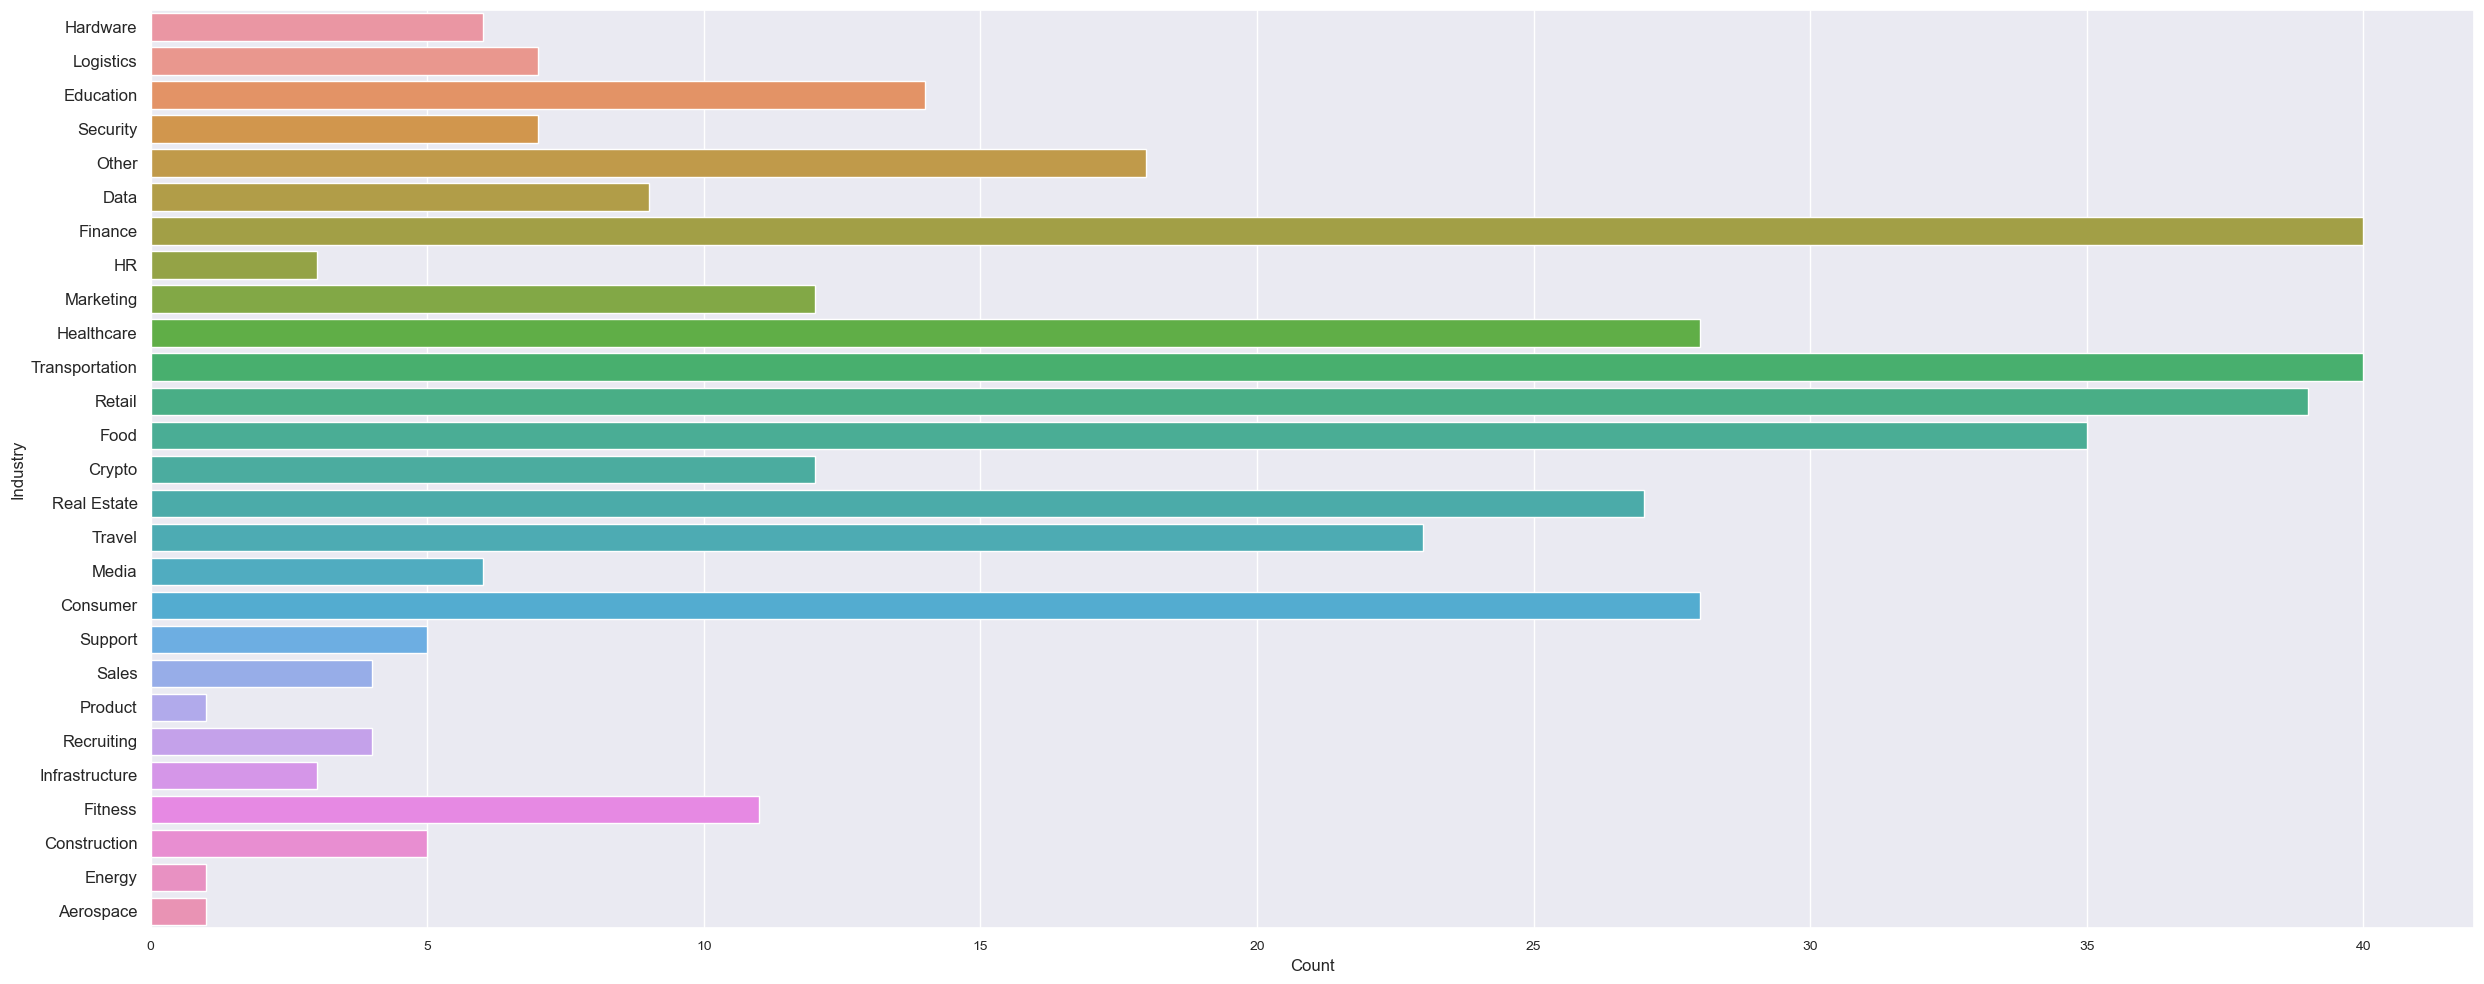

In [21]:
plt.figure(figsize=(25,10))
sns.countplot(data=grp4_insight, y=grp4_insight['Industry'])
plt.xticks(fontsize=10), plt.yticks(fontsize=12)
plt.xlabel('Count'),plt.ylabel('Industry')
plt.tight_layout()
plt.show()

In [22]:
Top_10=grp4_insight.sort_values('Laid_Off_Count',ascending=False).head(10).reset_index()
Top_10

,index,Company,Location_HQ,Industry,Percentage,Date,Funds_Raised,Stage,Country,Laid_Off_Count
0,126,Google,SF Bay Area,Consumer,0.06,2023,26.0,Post-IPO,United States,12000.0
1,590,Meta,SF Bay Area,Consumer,0.13,2022,26000.0,Post-IPO,United States,11000.0
2,522,Amazon,Seattle,Retail,0.03,2022,108.0,Post-IPO,United States,10000.0
3,158,Microsoft,Seattle,Other,0.05,2023,1.0,Post-IPO,United States,10000.0
4,297,Salesforce,SF Bay Area,Sales,0.10,2023,65.0,Post-IPO,United States,8000.0
5,296,Amazon,Seattle,Retail,0.02,2023,108.0,Post-IPO,United States,8000.0
6,1,Dell,Austin,Hardware,0.05,2023,NaN,Post-IPO,United States,6650.0
7,56,Philips,Amsterdam,Healthcare,0.13,2023,NaN,Post-IPO,Netherlands,6000.0
8,1616,Booking.com,Amsterdam,Travel,0.25,2020,NaN,Acquired,Netherlands,4375.0
9,523,Cisco,SF Bay Area,Infrastructure,0.05,2022,2.0,Post-IPO,United States,4100.0


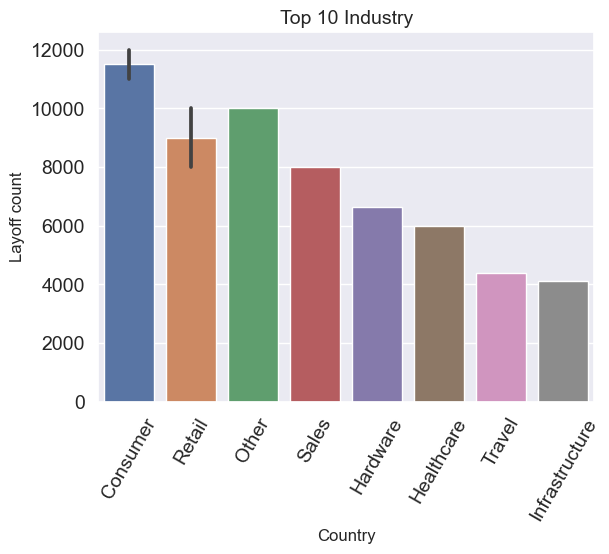

In [23]:
sns.barplot(data=Top_10,x=Top_10['Industry'],y=Top_10['Laid_Off_Count'])
plt.xticks(rotation = 60)
plt.xlabel('Country'), plt.ylabel('Layoff count')
plt.title("Top 10 Industry", fontsize=14), plt.xticks(fontsize=14), plt.yticks(fontsize=14)
plt.show()